In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/slump_test.csv')
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

In [ ]:
# Step 2: Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

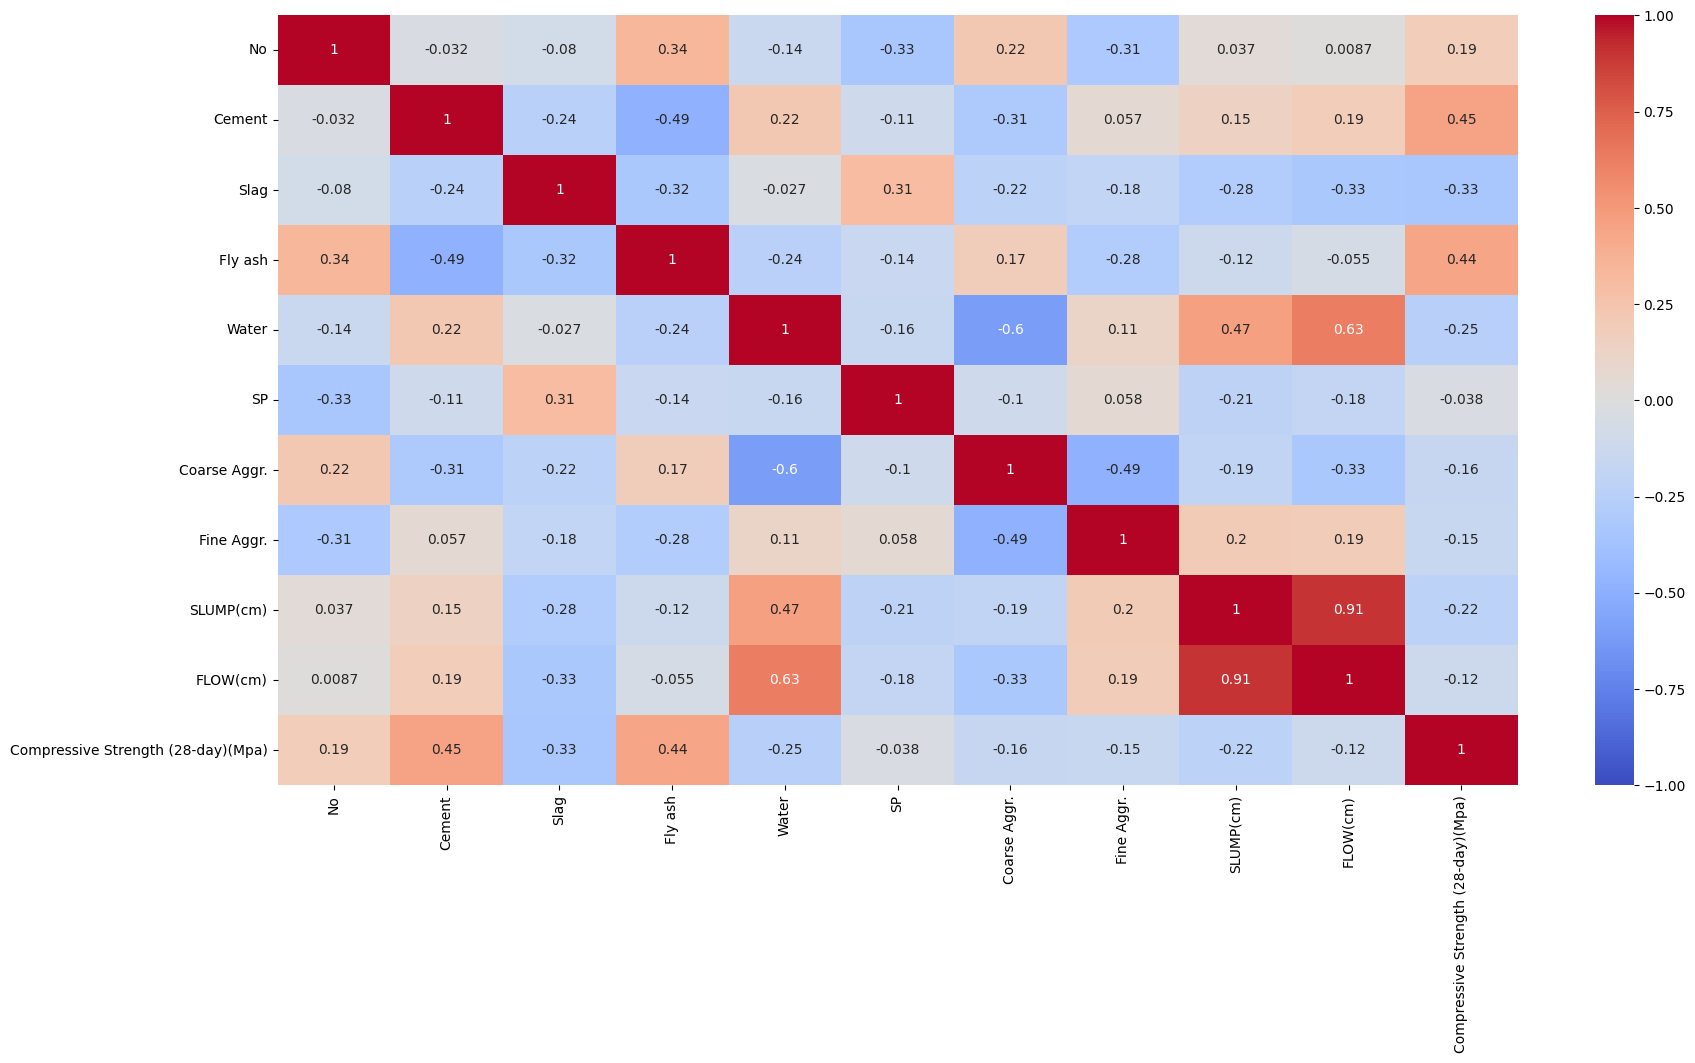

In [ ]:
# Check the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
# Check the normality of the input features
statistics = []
for feature in df.columns[:-1]:
    _, p = stats.shapiro(df[feature])
    statistics.append((feature, p))

for feature, p in statistics:
    if p < 0.05:
        print(f'{feature} is not normally distributed.')

No is not normally distributed.
Cement is not normally distributed.
Slag is not normally distributed.
Fly ash is not normally distributed.
Water is not normally distributed.
SP is not normally distributed.
Coarse Aggr. is not normally distributed.
Fine Aggr. is not normally distributed.
SLUMP(cm) is not normally distributed.
FLOW(cm) is not normally distributed.


In [ ]:
# Check for missing values and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

No                                    0
Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64
0


In [ ]:
# Step 3: Feature Selection
# Split the data into features and target variable
X = df.drop("Compressive Strength (28-day)(Mpa)", axis = 1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [ ]:
# Step 4: Model Training

In [ ]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
df.describe()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,52.000000,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,29.877528,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,1.000000,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,26.500000,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,52.000000,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,77.500000,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,103.000000,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [ ]:
# import StandardScaler and scale the data. Use fit_transform() on the training
# set and transform() on the testing set to prevent data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,8.200000e+01,8.200000e+01,82.000000,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01
mean,5.686508e-17,2.978647e-17,0.000000,1.218537e-16,-6.539484e-16,6.295777e-17,4.088870e-16,2.349069e-16,-5.144936e-17,-2.437075e-17
std,1.006154e+00,1.006154e+00,1.006154,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00
min,-1.732899e+00,-1.180229e+00,-1.297210,-1.649362e+00,-1.781644e+00,-1.423970e+00,-2.054253e+00,-1.582879e+00,-1.960431e+00,-1.591123e+00
25%,-8.994314e-01,-9.903178e-01,-1.295158,-3.768276e-01,-8.399961e-01,-8.743235e-01,-7.078243e-01,-8.808308e-01,-3.489879e-01,-9.182109e-01
50%,5.310296e-02,2.001016e-02,0.360864,2.083110e-01,-9.401561e-02,-2.903240e-01,-8.442514e-02,8.820468e-02,4.150585e-01,1.892908e-01
75%,8.355419e-01,9.334834e-01,0.800008,1.037447e+00,5.663605e-01,4.997930e-01,7.379493e-01,7.214955e-01,7.067852e-01,8.369690e-01
max,1.703029e+00,1.820369e+00,1.871189,1.191117e+00,2.131697e+00,3.591555e+00,1.838719e+00,2.621368e+00,1.262455e+00,1.661287e+00


In [ ]:
# Build a linear regression model, fit the model, and make predictions on the
# test and train set, and compare them.

In [ ]:
# Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [ ]:
from sklearn.pipeline import Pipeline # pipeline is used to combine scaler and model .

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # will be used in pipeline later

In [ ]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)])
# pipeline is used to combine scaler and model

In [ ]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [ ]:
y_pred = pipe_lm.predict(X_test) # predict on test data
y_train_pred = pipe_lm.predict(X_train) # predict on train data

In [ ]:
# Evaluate the model if it is appropriate to linear regression,to do so use
# residuals and R-squared.

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):

    scores = {model_name + "_train" : {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))},

              model_name + "_test" : {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [ ]:
ls = train_val(y_train , y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.907545,0.915059
mae,1.932065,1.673796
mse,5.851039,4.297758
rmse,2.418892,2.073104


In [ ]:
# cross validate

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys() #list(SCORES.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [ ]:
from sklearn.model_selection import cross_validate , cross_val_score

In [ ]:
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', \
                                                           'neg_root_mean_squared_error'], cv = 5)

In [ ]:
pd.DataFrame(scores , index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.022352,0.006018,0.942563,-1.927445,-4.616616,-2.148631
2,0.008321,0.005141,0.678413,-2.811908,-11.791237,-3.433837
3,0.008732,0.005128,0.852009,-1.524017,-4.112753,-2.027992
4,0.008600,0.005596,0.917465,-2.280052,-9.059885,-3.009964
5,0.009132,0.004934,0.796519,-2.864769,-11.518696,-3.393920


In [ ]:
scores = pd.DataFrame(scores , index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                             0.837394
test_neg_mean_absolute_error       -2.281638
test_neg_mean_squared_error        -8.219838
test_neg_root_mean_squared_error   -2.802869
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907545,0.915059
mae,1.932065,1.673796
mse,5.851039,4.297758
rmse,2.418892,2.073104


In [ ]:
print("train RMSE:", 2.424/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.738/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725968869037677
CV RMSE: 0.0759723711362424


In [ ]:
pipe_lm["lm"].coef_

array([-0.23575689,  5.21272662, -1.21624493,  5.01128179, -4.11149222,
        0.16046564, -4.08468783, -1.78117914, -2.15690637,  1.4968071 ])

In [ ]:
# Interpret the model by looking at the coefficients

In [ ]:
lm_df = pd.DataFrame(pipe_lm["lm"].coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-0.235757
1,5.212727
2,-1.216245
3,5.011282
4,-4.111492
5,0.160466
6,-4.084688
7,-1.781179
8,-2.156906
9,1.496807
